# Mini projet - Appstore Games

*Maxime DUBOST - M1 IoT - 16/11/2020*

## Définition de la tâche

Le but de ce projet sera d'observer le prix des applications en fonction des notes moyennes qui leur sont attribuées et de l'année de publication de ces applications

## Nettoyage des données

Tout d'abord, importons les librairies nécessaires ainsi que le dataset :

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import utils
from sklearn import tree
import graphviz
import os

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/MaximeDubost/appstore_games/master/appstore_games.csv')

Affichons les colonnes du dataset :

In [3]:
df.dtypes

URL                              object
ID                                int64
Name                             object
Subtitle                         object
Icon URL                         object
Average User Rating             float64
User Rating Count               float64
Price                           float64
In-app Purchases                 object
Description                      object
Developer                        object
Age Rating                       object
Languages                        object
Size                            float64
Primary Genre                    object
Genres                           object
Original Release Date            object
Current Version Release Date     object
dtype: object

Création d'un dataset ne contenant que les champs utiles (en les renommants) :

In [4]:
df = pd.DataFrame({"name": df["Name"], "rating": df["Average User Rating"], "year": pd.DatetimeIndex(df['Original Release Date']).year, "price": df["Price"]})
df.isna().sum()

name         0
rating    9446
year         0
price       24
dtype: int64

Nous pouvons voir que certaines colonnes ont des lignes vides. Afin de faciliter notre traitement, nous n'allons pas inclure ces lignes dans notre étude.

In [5]:
df = df.loc[df.rating.notnull(), ['name', 'rating','year', 'price']]
df.isna().sum()

name      0
rating    0
year      0
price     0
dtype: int64

In [6]:
df.shape

(7561, 4)

Nous travaillerons donc avec ce dataset final de 3 colonnes et de 7561 lignes.

## Analyse des données

Voici la tête de notre dataset :

In [7]:
df.head()

,name,rating,year,price
0,Sudoku,4.0,2008,2.99
1,Reversi,3.5,2008,1.99
2,Morocco,3.0,2008,0.00
3,Sudoku (Free),3.5,2008,0.00
4,Senet Deluxe,3.5,2008,2.99


Et voici les statistiques descriptives de notre dataset :

In [8]:
df.describe()

,rating,year,price
count,7561.000000,7561.000000,7561.000000
mean,4.060905,2014.856236,0.571305
std,0.751428,2.610184,2.415658
min,1.000000,2008.000000,0.000000
25%,3.500000,2013.000000,0.000000
50%,4.500000,2015.000000,0.000000
75%,4.500000,2017.000000,0.000000
max,5.000000,2019.000000,139.990000


Visualisons les données sous forme de diagrammes de répartition des données (type gaussienne sur les données) :

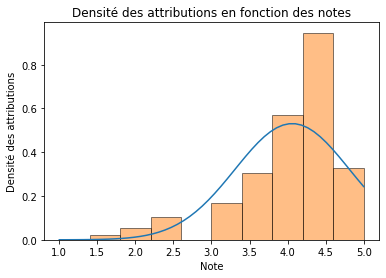

In [30]:
std = np.std(df.rating, ddof=1)
mean = np.mean(df.rating)
domain = np.linspace(np.min(df.rating), np.max(df.rating))
plt.plot(domain, norm.pdf(domain, mean, std))
plt.hist(df.rating, edgecolor = 'black', alpha = 0.5, density = True)
plt.title('Densité des attributions en fonction des notes')
plt.xlabel('Note')
plt.ylabel('Densité des attributions')
plt.show()

Visualisons les données sous forme d'histogramme :

Text(0, 0.5, 'Fréquence')

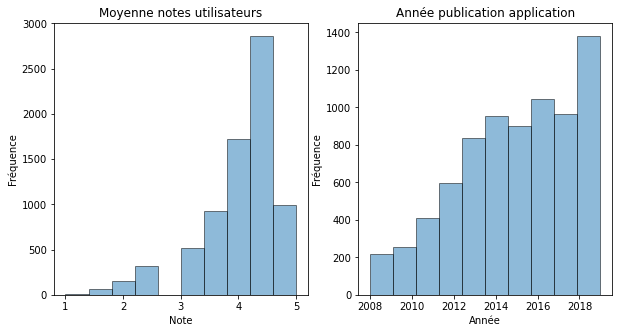

In [10]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df.rating, edgecolor = 'black', alpha = 0.5)
plt.title('Moyenne notes utilisateurs')
plt.xlabel('Note')
plt.ylabel('Fréquence')
plt.subplot(1, 2, 2)
plt.hist(df.year, edgecolor = 'black', alpha = 0.5)
plt.title('Année publication application')
plt.xlabel('Année')
plt.ylabel('Fréquence')

Visualisation des données sour forme de boîtes à moustache :

Text(0, 0.5, 'Année')

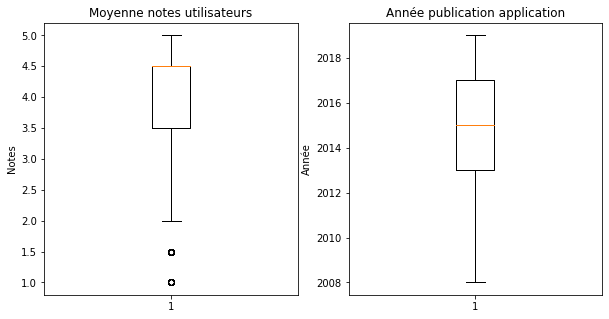

In [11]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(df.rating)
plt.title('Moyenne notes utilisateurs')
plt.ylabel('Notes')
plt.subplot(1, 2, 2)
plt.boxplot(df.year)
plt.title('Année publication application')
plt.ylabel('Année')

Visualisation des données sous forme de barres et en fonction du prix :

Text(0, 0.5, 'Prix ($)')

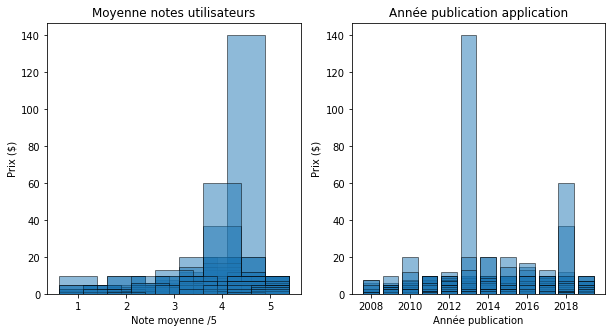

In [42]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(df.rating, df.price, edgecolor = 'black', alpha = 0.5)
plt.title('Moyenne notes utilisateurs')
plt.xlabel('Note moyenne /5')
plt.ylabel('Prix ($)')
plt.subplot(1, 2, 2)
plt.bar(df.year, df.price, edgecolor = 'black', alpha = 0.5)
plt.title('Année publication application')
plt.xlabel('Année publication')
plt.ylabel('Prix ($)')

## Préparation des données pour l'apprentissage automatique supervisé

In [12]:
y = df.price
X = df[['rating', 'year']]

In [13]:
X.head()

,rating,year
0,4.0,2008
1,3.5,2008
2,3.0,2008
3,3.5,2008
4,3.5,2008


In [14]:
y.head()

0    2.99
1    1.99
2    0.00
3    0.00
4    2.99
Name: price, dtype: float64

## Construire un modèle

In [15]:
test_size = 0.33
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [16]:
X_train.head()

,rating,year
15703,4.0,2018
1601,4.5,2012
8291,4.0,2018
3169,4.5,2014
7325,4.0,2016


In [17]:
X_test.head()

,rating,year
8895,4.5,2016
5369,5.0,2015
2911,5.0,2013
1271,4.5,2012
13618,5.0,2018


In [18]:
y_train.head()

15703    1.99
1601     4.99
8291     0.00
3169     0.00
7325     0.00
Name: price, dtype: float64

In [19]:
y_test.head()

8895     0.0
5369     0.0
2911     0.0
1271     0.0
13618    0.0
Name: price, dtype: float64

In [20]:
model = DecisionTreeClassifier()

In [21]:
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_train)

In [22]:
model.fit(X_train, y_train.astype('int'))

DecisionTreeClassifier()

In [23]:
predictions = model.predict(X_train)

In [24]:
accuracy_score(y_train.astype('int'), predictions)

0.8845014807502468

## Évaluation du modèle

In [25]:
dot_data = tree.export_graphviz(model, 
                                feature_names=X.columns, 
                                #class_names=model.classes_, 
                                filled=True, 
                                rounded=True, 
                                special_characters=True)
graph = graphviz.Source(dot_data)

In [28]:
os.environ["PATH"] += os.pathsep + 'D:/Program Files/Graphviz/bin/'

In [29]:
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH